In [1]:
import sys
sys.path.append("../simcmb/")
sys.path.append("../simcmb/settings/")

import camb_ps_maker as cpm
import yam_in as yi

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class Struct(object):
    def __init__(self, data):
        for name, value in data.items():
            setattr(self, name, self._wrap(value))

    def _wrap(self, value):
        if isinstance(value, (tuple, list, set, frozenset)): 
            return type(value)([self._wrap(v) for v in value])
        else:
            return Struct(value) if isinstance(value, dict) else value

In [3]:
Yd0 = yi.Ydict("../simcmb/settings/planck_2018_1e4.yaml")
PM0 = cpm.PS_Maker(Yd0)

In [4]:
cl0 = PM0.get_cls(PM0.Ydict.pars)

from 16:31:36.393645 P to 16:31:37.478184 P or 1.84539 seconds total


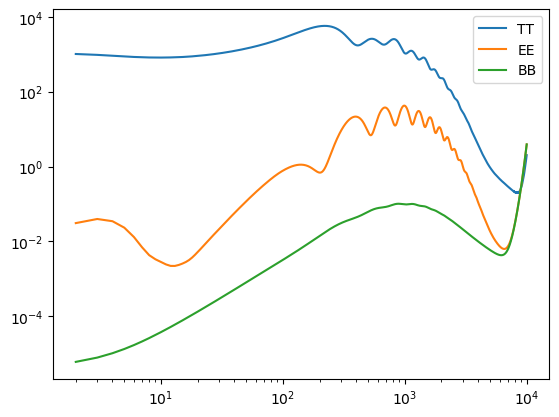

In [5]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT')
plt.plot(cl0['l'][2:], cl0['clEE'][2:], label='EE')
plt.plot(cl0['l'][2:], cl0['clBB'][2:], label='BB')
plt.loglog()
plt.legend()
plt.show()